Matplotlib is building the font cache; this may take a moment.


Координата первого объекта относительно первой главной компоненты: 28.204
Координата первого объекта относительно второй главной компоненты: 11.473
Доля объясненной дисперсии для первых двух компонент: 0.704
Минимальное количество главных компонент для объяснения более 85% дисперсии: 3


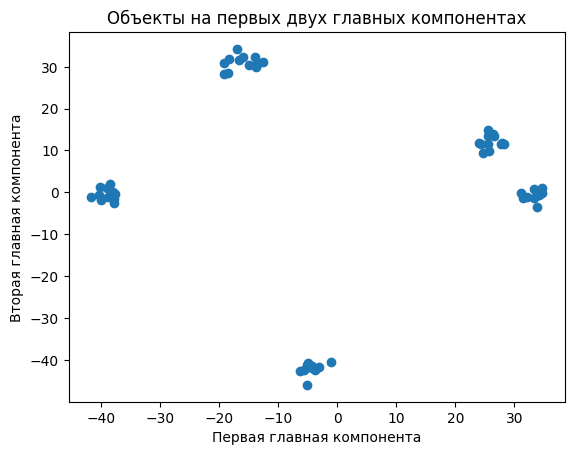

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Чтение данных без заголовков
input_file = "../models/37_25.csv"  # Замените на путь к вашему файлу
df = pd.read_csv(input_file, header=None)

# Преобразование в numpy массив
X = df.to_numpy()

# 2. Применение метода PCA для всех компонент
pca = PCA()
pca.fit(X)

# Трансформация данных в новые координаты
X_transformed = pca.transform(X)

# 3. Координаты первого объекта относительно первой и второй главной компоненты
coord_first_obj_component_1 = X_transformed[0, 0]
coord_first_obj_component_2 = X_transformed[0, 1]

print(f"Координата первого объекта относительно первой главной компоненты: {coord_first_obj_component_1:.3f}")
print(f"Координата первого объекта относительно второй главной компоненты: {coord_first_obj_component_2:.3f}")

# 4. Доля объясненной дисперсии для первых двух компонент
explained_variance_ratio_2 = pca.explained_variance_ratio_[:2].sum()
print(f"Доля объясненной дисперсии для первых двух компонент: {explained_variance_ratio_2:.3f}")

# 5. Минимальное количество главных компонент для объяснения более 85% дисперсии
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components_85 = (cumulative_variance >= 0.85).argmax() + 1
print(f"Минимальное количество главных компонент для объяснения более 85% дисперсии: {num_components_85}")

# 6. Визуализация данных на первых двух главных компонентах для оценки групп
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Объекты на первых двух главных компонентах')
plt.show()



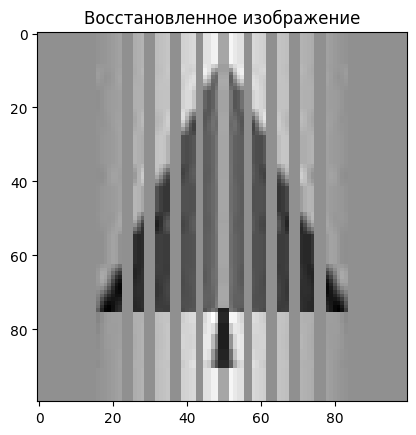

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Функция для загрузки и проверки данных
def load_and_check_csv(file_path):
    # Чтение данных с явным указанием, что это числа
    data = pd.read_csv(file_path, header=None, dtype=float, delimiter=";")

    # Преобразование в numpy массив
    return data.to_numpy()


# Чтение матрицы счётов (проекции на главные компоненты)
score_matrix_file = "../models/X_loadings_792.csv" 
score_matrix = load_and_check_csv(score_matrix_file)

# Чтение матрицы весов (главные компоненты)
weight_matrix_file = "../models/X_reduced_792.csv"  
weight_matrix = load_and_check_csv(weight_matrix_file)


# Восстановление исходного изображения
X_reconstructed = np.dot(weight_matrix, score_matrix.T)

# Визуализация восстановленного изображения
plt.imshow(X_reconstructed, cmap='gray')
plt.title('Восстановленное изображение')
plt.show()


